In [ ]:
!pip install accelerate==0.21.0 transformers==4.39.3 diffusers==0.27.2 peft==0.10.0

In [ ]:
import torch
from diffusers import DiffusionPipeline

In [ ]:
torch.backends.cuda.enable_flash_sdp(False)
torch.backends.cuda.enable_mem_efficient_sdp(True)

In [ ]:
import diffusers.pipelines.pipeline_utils

In [ ]:
pipe = DiffusionPipeline.from_pretrained(
    "longlian/lmd_plus",
    custom_pipeline="llm_grounded_diffusion",
    custom_revision="main",
    variant="fp16", torch_dtype=torch.float16
)

pipe.enable_model_cpu_offload()

  0%|          | 0/50 [00:00<?, ?it/s]

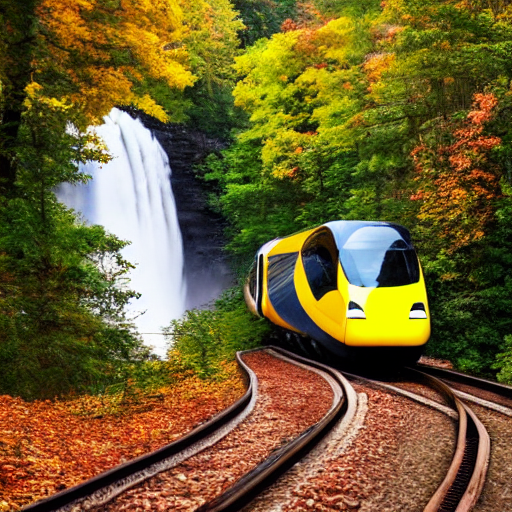

In [ ]:
prompt = "a waterfall and a modern high speed train in a beautiful forest with fall foliage"
llm_response = """
[('a waterfall', [71, 105, 148, 258]), ('a modern high speed train', [255, 223, 181, 149])]
Background prompt: A beautiful forest with fall foliage
Negative prompt:
"""

phrases, boxes, bg_prompt, neg_prompt = pipe.parse_llm_response(llm_response)

images = pipe(
    prompt=prompt,
    negative_prompt=neg_prompt,
    phrases=phrases,
    boxes=boxes,
    gligen_scheduled_sampling_beta=0.4,
    output_type="pil",
    num_inference_steps=50,
    lmd_guidance_kwargs={}
).images

images[0]